In [34]:
import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis 
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import random
import seaborn as sns
from yahoofinancials import YahooFinancials

In [35]:
#cumulative returns, standard deviations and Sharpe ratios to analyse individual stocks

In [36]:
tickersymbols= ['PDYPY','JPM','NVDA']
start = '2010-01-01'
end = '2020-12-20'
time = 'daily'

In [37]:
stock_ticker = (tickersymbols[0]) # Stock Ticker
stock_name = YahooFinancials(stock_ticker)
data = stock_name.get_historical_price_data(start_date=start,
                                               end_date =end,
                                               time_interval =time)
A1 = pd.DataFrame(data[stock_ticker]['prices'])
A1

,date,high,low,open,close,volume,adjclose,formatted_date
0,1438349400,47.750000,47.750000,47.750000,47.750000,0,42.897285,2015-07-31
1,1438608600,47.750000,47.750000,47.750000,47.750000,0,42.897285,2015-08-03
2,1438695000,47.750000,47.750000,47.750000,47.750000,0,42.897285,2015-08-04
3,1438781400,47.750000,47.750000,47.750000,47.750000,0,42.897285,2015-08-05
4,1438867800,47.750000,47.750000,47.750000,47.750000,0,42.897285,2015-08-06
...,...,...,...,...,...,...,...,...
1353,1607956200,102.000000,100.500000,101.129997,100.985001,7400,100.985001,2020-12-14
1354,1608042600,103.629997,101.449997,101.584000,102.400002,18000,102.400002,2020-12-15
1355,1608129000,105.639999,103.070000,103.629997,104.800003,15600,104.800003,2020-12-16
1356,1608215400,106.500000,104.730003,105.300003,104.857002,20500,104.857002,2020-12-17


In [38]:
stock_ticker = (tickersymbols[1]) # Stock Ticker
stock_name = YahooFinancials(stock_ticker)
data = stock_name.get_historical_price_data(start_date=start,
                                               end_date =end,
                                               time_interval =time)
B1 = pd.DataFrame(data[stock_ticker]['prices'])

In [39]:
stock_ticker = (tickersymbols[2]) # Stock Ticker
stock_name = YahooFinancials(stock_ticker)
data = stock_name.get_historical_price_data(start_date=start,
                                               end_date =end,
                                               time_interval =time)
C1 = pd.DataFrame(data[stock_ticker]['prices'])

In [40]:
columns = ['close','formatted_date']
A1 = pd.DataFrame(A1, columns=columns)

B1 = pd.DataFrame(B1, columns=columns)

C1 =  pd.DataFrame(C1, columns=columns) 


In [41]:
A2 = A1.set_index('formatted_date')
B2 = B1.set_index('formatted_date')
C2 = C1.set_index('formatted_date')

In [42]:
C2

,close
formatted_date,
2010-01-04,18.490000
2010-01-05,18.760000
2010-01-06,18.879999
2010-01-07,18.510000
2010-01-08,18.549999
...,...
2020-12-14,532.349976
2020-12-15,534.419983
2020-12-16,529.700012


In [43]:
stocks_df = pd.concat([A2, B2, C2], axis='columns', join='inner')
stocks_df.columns = (tickersymbols)

In [44]:
stocks_df

,PDYPY,JPM,NVDA
formatted_date,,,
2015-07-31,47.750000,68.529999,19.950001
2015-08-03,47.750000,68.529999,20.290001
2015-08-04,47.750000,68.459999,20.370001
2015-08-05,47.750000,68.730003,20.580000
2015-08-06,47.750000,68.250000,20.450001
...,...,...,...
2020-12-14,100.985001,118.300003,532.349976
2020-12-15,102.400002,120.320000,534.419983
2020-12-16,104.800003,120.669998,529.700012


In [45]:
#useful tips for risk analysis
#https://medium.com/datadriveninvestor/stocks-risks-analysis-with-python-d584bc08f938
#https://towardsdatascience.com/how-to-perform-scenario-analysis-of-a-financial-portfolio-in-python-c2a68f05dd1f
#https://medium.com/financeexplained/learn-to-calculate-your-portfolios-value-at-risk-e1e2c5c68456


In [46]:
stocks_df_pcc = stocks_df.pct_change().dropna()

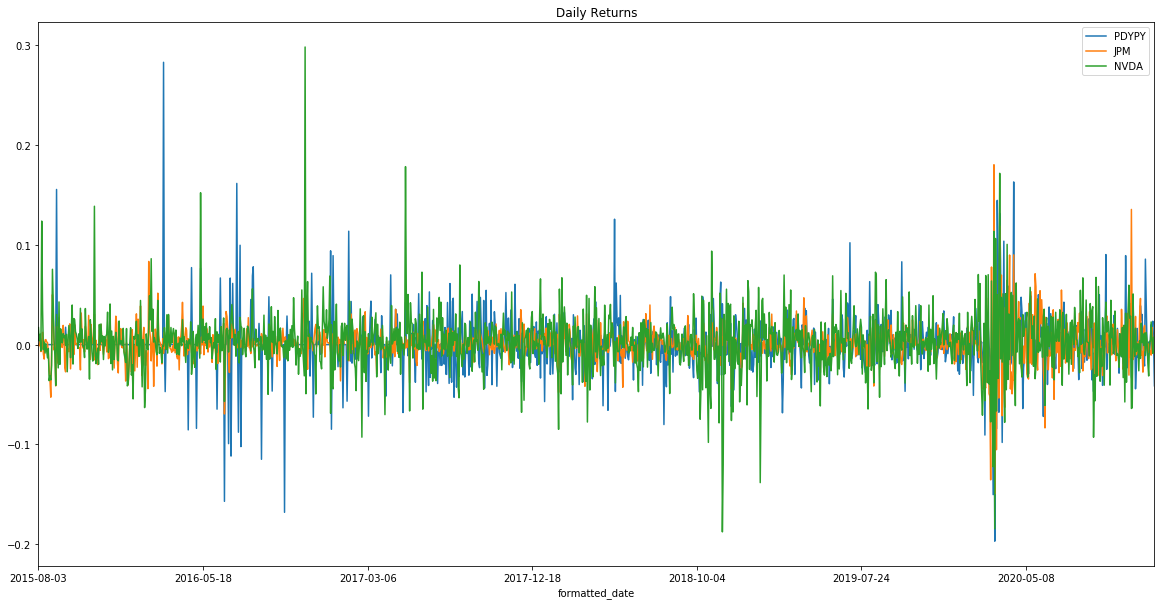

In [47]:
stocks_df_pcc.plot(figsize=(20, 10), title="Daily Returns");


In [48]:
#TSLA Appears more volatile - unsurprisingly

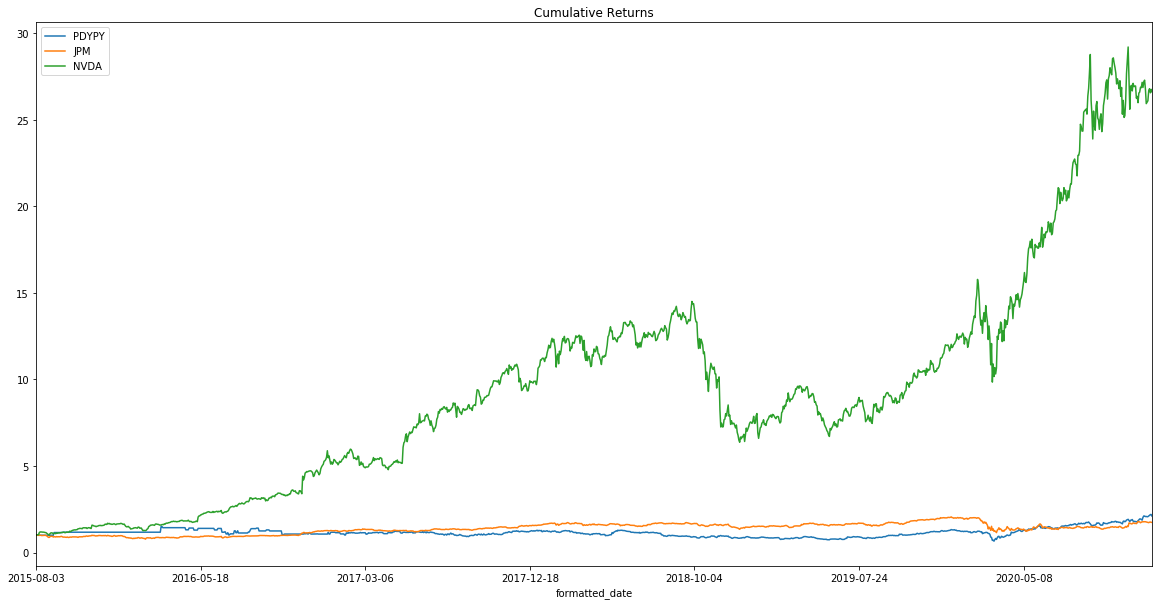

In [49]:
# Calculate cumulative returns
cumulative_returns = (1 + stocks_df_pcc).cumprod()
cumulative_returns.plot(figsize=(20, 10), title="Cumulative Returns");

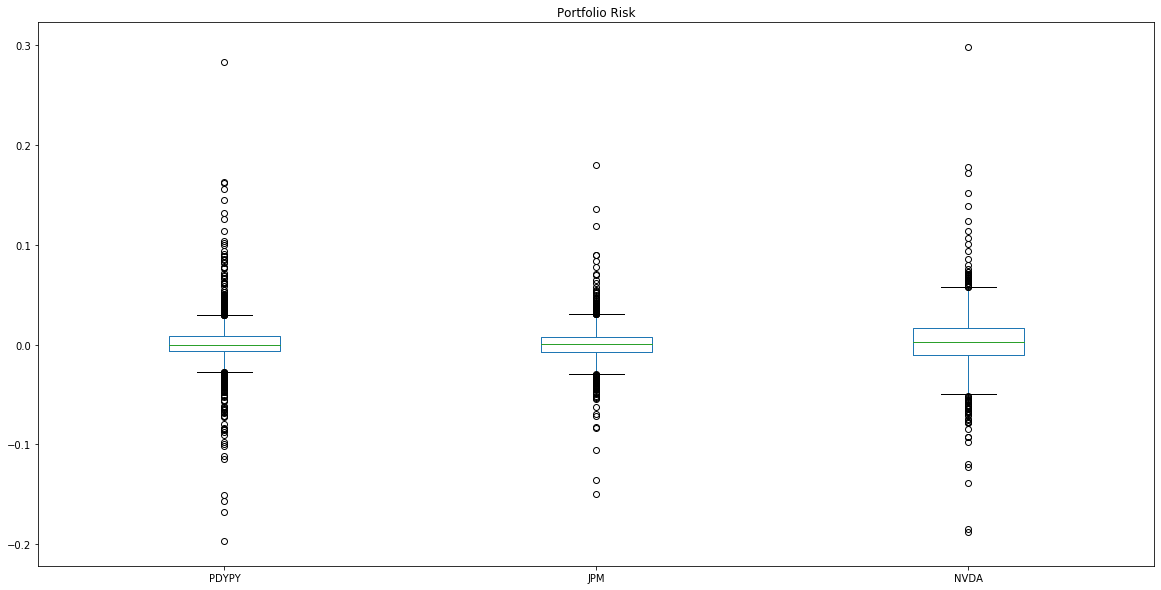

In [50]:
stocks_df_pcc.plot.box(figsize=(20, 10), title="Portfolio Risk");

In [51]:
#standard deviation of each stock

In [52]:
stocks_df_pcc.std()

PDYPY    0.027558
JPM      0.019062
NVDA     0.029694
dtype: float64

In [53]:
# Calculate annualized standard deviation (252 trading days)
stocks_df_pcc.std() * np.sqrt(252)

PDYPY    0.437465
JPM      0.302597
NVDA     0.471374
dtype: float64

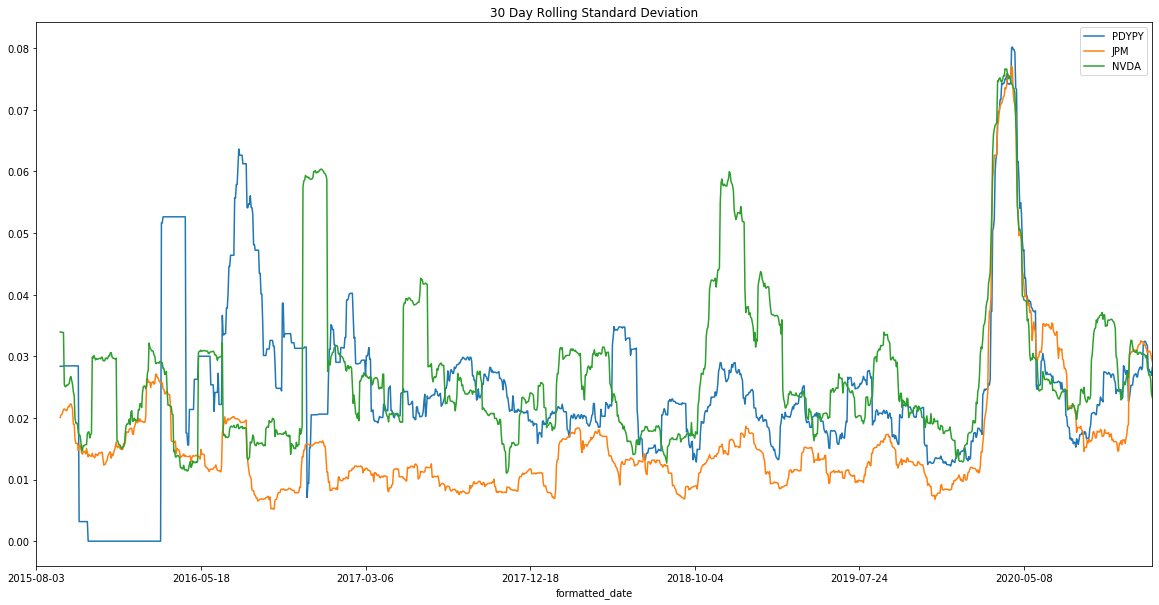

In [54]:
# Calculate and plot the rolling standard deviation for each stock using a 30 trading day window
stocks_df_pcc.rolling(window=30).std().plot(figsize=(20, 10), title="30 Day Rolling Standard Deviation");

In [55]:
#According to the plot above, years 2013,2019,2020 were highly volatile for TSLA stocks. In contrast, the year 2017 was the one with the lowest volatility for most of the stocks

In [56]:
# Calculate annualized Sharpe Ratios
sharpe_ratios = (stocks_df_pcc.mean() * 252) / (stocks_df_pcc.std() * np.sqrt(252))
sharpe_ratios = sharpe_ratios.sort_values(ascending=False)
sharpe_ratios


NVDA     1.527759
PDYPY    0.533041
JPM      0.489942
dtype: float64

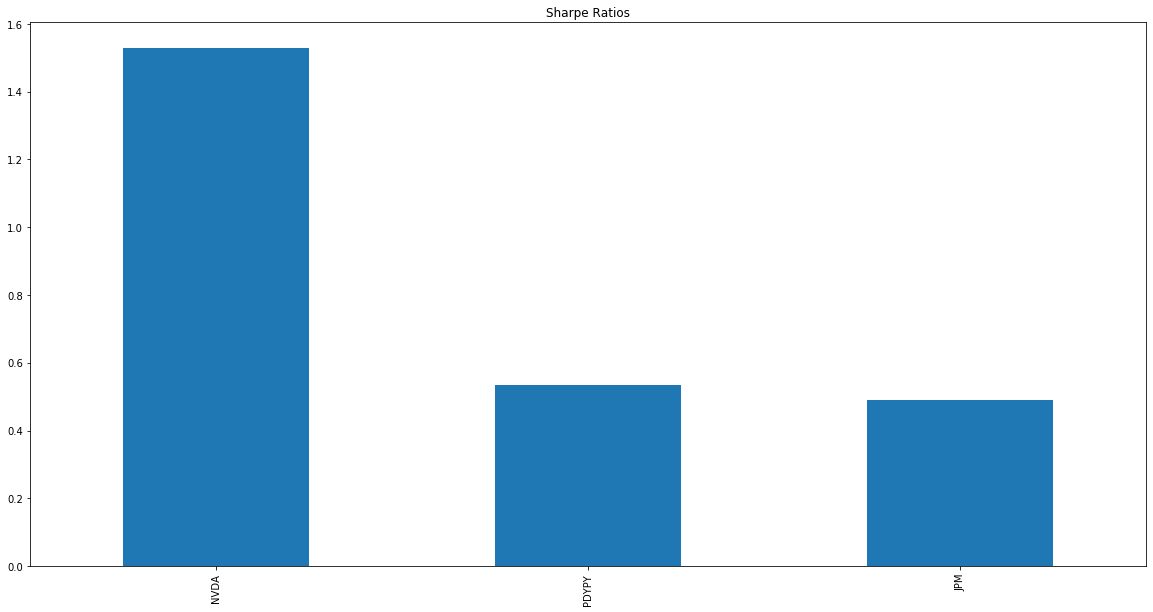

In [57]:
sharpe_ratios.plot(figsize=(20, 10), kind="bar", title="Sharpe Ratios");

In [92]:
#VAR using Historical Simulation

In [108]:
stocks1 = stocks_df
stocks1.iloc[:,0]

formatted_date
2015-07-31     47.750000
2015-08-03     47.750000
2015-08-04     47.750000
2015-08-05     47.750000
2015-08-06     47.750000
                 ...    
2020-12-14    100.985001
2020-12-15    102.400002
2020-12-16    104.800003
2020-12-17    104.857002
2020-12-18    100.529999
Name: PDYPY, Length: 1358, dtype: float64

In [113]:
stocks1['Portfoliovalue'] =(stocks1.iloc[:,0]*10)+(stocks1.iloc[:,1]*20)+(stocks1.iloc[:,2]*30)
stocks1['perc_change'] = stocks1['Portfoliovalue'].pct_change()

In [121]:
valuelocforpercentile = round(len(stocks1)) * (1-(5 / 100))

In [124]:
sortedhistdata = stocks1.sort_values(by = ['perc_change'])
print(sortedhistdata)

                    PDYPY         JPM        NVDA  Portfoliovalue  perc_change
formatted_date                                                                
2020-03-16      33.529999   88.360001  196.399994     7994.499817    -0.177597
2018-11-16      46.380001  109.989998  164.429993     7596.499748    -0.128712
2020-03-12      42.700001   88.050003  216.309998     8677.299995    -0.115986
2019-01-28      40.674999  103.879997  138.009995     6624.649773    -0.088719
2020-03-09      52.650002   93.440002  245.440002     9758.500137    -0.087257
...                   ...         ...         ...             ...          ...
2017-05-10      55.970001   87.430000  121.290001     5947.000046     0.109474
2020-03-13      41.750000  103.910004  240.839996     9720.899963     0.120268
2016-11-11      51.000000   76.690002   87.970001     4682.900085     0.148868
2020-03-24      40.959999   88.430000  249.179993     9653.599777     0.159828
2015-07-31      47.750000   68.529999   19.950001   

ValueError: Location based indexing can only have [integer, integer slice (START point is INCLUDED, END point is EXCLUDED), listlike of integers, boolean array] types

In [58]:
#Monte Carlo Simulation of Individual Asset

In [59]:
def simulate_returns(historical_returns,forecast_days):
  return historical_returns.sample(n = forecast_days, 
                replace = True).reset_index(drop = True)

In [60]:
simulate_returns(stocks_df_pcc['NVDA'],1000)

0      0.023616
1      0.010955
2      0.015072
3      0.002022
4      0.055592
         ...   
995   -0.092775
996   -0.000865
997    0.000240
998    0.005786
999    0.029517
Name: NVDA, Length: 1000, dtype: float64

In [61]:
#Monte Carlo Simulation of Portfolio of Assets

In [62]:
portfolio_composition = [((tickersymbols[0]),0.5),((tickersymbols[1]),0.2),((tickersymbols[2]),0.3)]
print(portfolio_composition)

[('PDYPY', 0.5), ('JPM', 0.2), ('NVDA', 0.3)]


In [63]:
def simulate_portfolio(historical_returns, 
   composition, 
   forecast_days):
  result = 0
  for t in composition:
    name,weight = t[0],t[1]
    s = simulate_returns(stocks_df_pcc, 
      forecast_days)
    result = result + s * weight
  
  return(result)

In [64]:
t1 = simulate_portfolio(stocks_df_pcc ,portfolio_composition,20)
t2 = t1.iloc[:,0]+t1.iloc[:,1]+t1.iloc[:,2]
t2.head(20)

0     0.022769
1    -0.021773
2     0.028110
3    -0.001014
4     0.026860
5    -0.035214
6     0.024210
7    -0.009795
8     0.014058
9    -0.030307
10    0.056224
11   -0.000251
12    0.105720
13    0.006958
14   -0.025341
15   -0.037171
16    0.016933
17    0.013402
18    0.018038
19    0.028961
dtype: float64

In [65]:
#If we perform portfolio simulation as shown before, we are simply saying that the future returns are a random sample of the past returns. We know this isn’t completely true

In [66]:
# What if analysis

In [67]:
stocks_df_pcc.mean()

PDYPY    0.000925
JPM      0.000588
NVDA     0.002858
dtype: float64

In [68]:
#Let’s try to simulate what happens if the average returns drop by -0.0001 for MSFT, -0.001 for AAPL and -0.0005 for GOOG. We must subtract these quantities from each stock and then simulate the future portfolios with the new, modified data.

In [69]:
change1 = -0.001
change2 = -0.005
change3 = -0.0001
portfolio_composition = [((tickersymbols[0]),0.5, change1 ),((tickersymbols[1]),0.2, change2),((tickersymbols[2]),0.3, change3)]
print(portfolio_composition)

[('PDYPY', 0.5, -0.001), ('JPM', 0.2, -0.005), ('NVDA', 0.3, -0.0001)]


In [70]:
def simulate_modified_returns(
      stocks_df_pcc,
      forecast_days,
      correct_mean_by):
  h = stocks_df_pcc.copy()
  new_series = h + correct_mean_by
  return new_series.sample(n=forecast_days,  
     replace = True).reset_index(drop=True)

In [78]:
simulate_modified_returns(stocks_df_pcc['NVDA'],100,-0.0001)

0    -0.007579
1    -0.018815
2     0.032264
3    -0.022686
4    -0.014600
        ...   
95    0.037494
96    0.021386
97   -0.010053
98   -0.033864
99    0.049252
Name: NVDA, Length: 100, dtype: float64

In [87]:
def simulate_modified_portfolio(
   stocks_df_pcc,
   portfolio_composition,
   forecast_days):
  
  result = 0
  
  for t in portfolio_composition:
    name = t[0],
    weight = t[1],
    correction = t[2]
    s = simulate_modified_returns(
       stocks_df_pcc['return_%s' % (name)], 
       forecast_days,correction
    )
    
    result = result + s * weight
  
  return(result)

In [89]:
simulate_modified_portfolio(stocks_df_pcc['NVDA'],portfolio_composition,100)

KeyError: 'return_PDYPY'

In [91]:
#Value at risk using historical simulation